In [ ]:
- title: Занятие 5
- author: Kononov Dmitrij
- date: 2025-03-06
- test_link: https://cs.mipt.ru:44367/cgi-bin/new-client?contest_id=10202
- test_comment: Задание №3
- slug: s2_lab05
- ipynb_url: download/s2_lab05.ipynb

# Занятие 5: Графы алгоритм Дейкстры.

## Цель: Освоить на практики алгоритм Дейкстры.

# Повторить
1. Гамильтонов цикл
2. Задача коммивояжёра.
3. Поиск длины кратчайшего пути при помощи алгоритма Дейкстры.

### Гамильтонов цикл
**Гамильтоновым циклом** в графе называют цикл, проходящий через все вершины, причём каждая вершина посещается только один раз. 

**Гамильтонов путь** — незамкнутый путь, проходящий через все вершины, причём каждая вершина посещается только один раз.

Ниже приведен переборный алгоритм поиска гамильтонова цикла в графе.

Если перенумеровать вершины в графе, то номера вершин в порядке следования их в гамильтоновом цикле образуют некоторую перестановку чисел от 1 до `n`. Можно перебрать все  возможные перестановки и для каждой из них проверить, что данная перестановка соответствует циклу на графе, то есть каждые два соседних элемента в перестановке, а также первый и последний элемент перестановки соединены ребром.

Алгоритм поиска перестановок во многом напоминает алгоритм обхода в глубину, но главное его отличие заключается в том, что если из какой-то вершины не удается продолжить путь дальше (то есть были рассмотрены все ребра и все возможные продолжения привели в тупик), то алгоритм возвращается в предыдущую вершину, при этом покинутая вершина «перекрашивается», то есть с нее снимается отметка о том, что эта вершина была посещена ранее. При этом алгоритм может вернуться в эту вершину еще раз, уже по другому пути (и даже обязан это сделать, если в графе существует гамильтонов путь, так как гамильтонов путь проходит через все вершины).
Пусть `n` — число вершин в графе, вершины пронумерованы числами от `0` до `n-1`. Граф задан матрицей смежности `A`. В глобальной переменной `Path` будет храниться список вершин, входящих в путь.  Функция `hamilton()` принимает в качестве параметра номер вершины, добавляемой к пути и возвращает значение `True`, если удалось построить гамильтонов путь и `False`, если не удалось. Причем если путь построить удалось, то построенный путь будет храниться в списке `Path`:
``` python

Visited = [False] * n
 Path = []
 def hamilton(curr): 
    Path.append(curr)
    if len(Path) == n:
        if A[Path[0]][Path[-1]] == 1:
            return True 
        else: 
            Path.pop() 
            return False 
    Visited[curr] = True
    for next in range(n): 
        if A[curr][next] == 1 and not Visited[next]: 
            if hamilton(next): 
                return True 
    Visited[curr] = False 
    Path.pop()
    return False
```
Функция `hamilton()` прежде всего добавляет вершину `curr` в конец списка `Path`. При этом если длина списка стала равна `n`, то есть все вершины включены в путь `Path`, проверяется, что первая и последняя вершина в пути соединены ребром (это не требуется при помощи гамильтонова пути), если это так — то алгоритм возвращает `True` (цикл найден), в противном случае из списка `Path` удаляется последний элемент и алгоритм возвращает `False` (цикл не найден).

Если же длина списка меньше `n`, то вершина `curr` отмечается, как посещенная и осуществляется перебор дальнейших продолжений. Последовательно перебираются все оставшиеся вершины `next` и если вершина `next` соединена ребром с `curr` и вершина `next` не была посещена, то алгоритм рекурсивно запускается из вершины `next`, пытаясь сделать продолжение пути в вершину `next`. При этом если рекурсивный вызов из вершины `next` вернет `True`, то есть удалось построить цикл, то алгоритм сразу же возвращает `True`, при этом из списка `Path` ничего не удаляется, поэтому `Path` будет хранить полный гамильтонов цикл. Если же ни одно из продолжений не получилось, то осуществляется «откат» вершины `curr` — она помечается, как непосещенная, удаляется из конца списка `Path` и управление передается назад, на последнюю вершину в списке `Path`.

Видно, что сложность алгоритма может быть не менее, чем `n!`, поэтому для больших графов такой алгоритм непригоден.

**Задание 1** — Для графа, изображенного ниже, выведите на экран гамильтонов цикл (нумерацию вершин задайте самостоятельно).
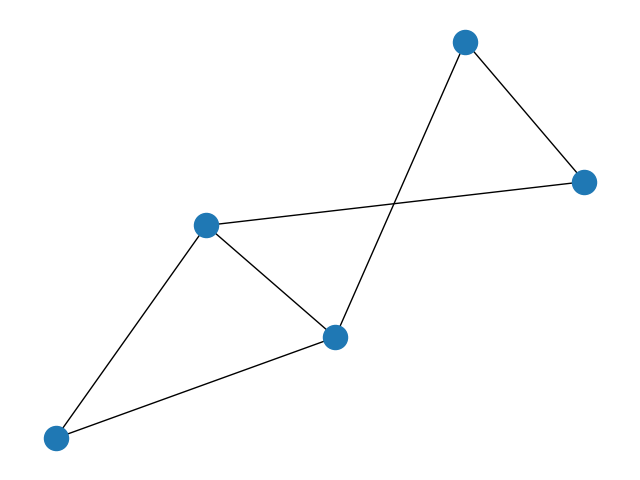

### Задача коммивояжера
Близкой задачей к задаче нахождения гамильтонова цикла является **задача коммивояжера**. Коммивояжеру необходимо посетить `n` городов и вернуться домой. Коммивояжер не хочет посещать города более одного раза и при этом хочет проделать наиболее короткий путь. То есть в неориентированном взвешенном графе необходимо найти путь наименьшей стоимости.
Задача коммивояжера решается аналогично задаче о гамильтоновом пути, но при этом нужно перебрать все возможные пути. При замыкании пути нужно вычислить его вес (лучше это делать не в конце замыкания, а одновременно с добавлением следующей вершины увеличивать вес построенного фрагмента пути на вес рассмотренного ребра) и сравнить вес найденного пути с весом наилучшего известного пути.

### Алгоритм Дейкстры
**Алгоритм Дейкстры** назван в честь голландского ученого Эдсгера Дейкстры (Edsger Dijkstra). Алгоритм был предложен в 1959 году для нахождения кратчайших путей от одной вершины до всех остальных в ориентированном взвешенном графе, при условии, что все ребра в графе имеют неотрицательные веса.
Пусть взвешенный граф хранится в памяти в виде матрицы смежности: будем считать, что вес ребра из вершины `i` в вершину `j` равен `w[i][j]`, то есть в матрице `w` хранятся веса ребра для любых двух вершин. Если из вершины `i` в вершину `j` нет ребра, то `w[i][j]==INF` для некоторого специального значения константы `INF`. Значение `INF` следует выбирать исходя из задачи.
Алгоритм Дейкстры относится к так называемым «жадным» алгоритмам. Пусть расстояние от начальной вершины `start` до вершины `i` хранится в массиве `dist[i]`. Начальные значения `dist[start]=0`, `dist[i]=INF` для всех остальных вершин `i`. То есть в самом начале алгоритму известен путь из вершины `start` до вершины `start` длины `0`, а до остальных вершин кратчайшие пути неизвестны. Между тем алгоритм будет постепенно улучшать значения в массиве `dist`, в результате получит кратчайшие расстояния до всех вершин.
Основная идея для улучшения называется «релаксацией ребра». Пусть из вершины `i` в вершину `j` есть ребро веса `w[i][j]`, при этом выполнено неравенство `dist[i] + w[i][j] < dist[j]`. То есть можно построить маршрут из начальной вершины до вершины `i` и добавить к нему ребро из `i` в `j`, и суммарная стоимость такого маршрута будет меньше, чем известная ранее стоимость маршрута из начальной вершины в вершину `j`. Тогда можно улучшить значение `dist[j]`, присвоив `dist[j] = dist[i] + w[i][j]`.
В алгоритме Дейкстры вершины красятся в два цвета, будем говорить, что вершина «неокрашенная» или «окрашенная». Изначально все вершины неокрашенные. Если алгоритм Дейкстры покрасил вершину `i`, то это означает, что найденное значение `dist[i]` является наилучшим возможным и в последствии не будет улучшаться, то есть значение `dist[i]` является кратчайшим расстоянием от начальной вершины до вершины `i`. Если же вершина не покрашена, то величина `dist[i]` для такой вершины `i` равна кратчайшему пути из вершины `start` до вершины `i`, который проходит только по покрашенным вершинам (за исключением самой вершины `i`).
На каждом шаге алгоритма Дейкстры красится одна новая вершина. В качестве такой вершины выбирается неокрашенная вершина `i` с наименьшим значением `D[i]`. Затем рассматриваются все ребра, исходящие из вершины `i`, и производится релаксация этих ребер, то есть улучшаются расстояния до вершин, смежных с `i`.
Алгоритм заканчивается, когда на очередном шаге не останется неокрашенных вершин или если расстояние до всех неокрашенных вершин будет равно `INF` (то есть эти вершины являются недостижимыми).
Запишем алгоритм Дейкстры. Пусть  — число вершин в графе, вершины пронумерованы от 0 до `n-1`. Номер начальной вершины — `start` и веса ребер хранятся в матрице `w`:
``` python
INF = 10 ** 10
dist = [INF] * n
dist[start] = 0
used = [False] * n
min_dist = 0
min_vertex = start
 while min_dist < INF:
    i = min_vertex 
    used[i] = True 
    for j in range(n): 
        if dist[i] + w[i][j] < dist[j]: 
            dist[j] = dist[i] + w[i][j] 
    min_dist = INF
    for j in range(n):
        if not used[j] and dist[j] < min_dist:
            min_dist = dist[j]
            min_vertex = j
```
Массив `used` будет хранить информацию о том, была ли покрашена вершина. Сначала инициализируются массивы `dist` и `used`. Затем запускается внешний цикл алгоритма, который выбирает неокрашенную вершину с минимальным расстоянием, номер этой вершины хранится в переменной `min_vertex`, а расстояние до этой вершины — в переменной `min_dist`. Если же `min_dist` оказывается равно `INF`, то значит все неокрашенные вершины являются недостижимыми и алгоритм заканчивает свою работу. Иначе найденная вершина окрашивается и после этого релаксируются все ребра, исходящие из этой вершины.

Для восстановления ответа, то есть для нахождения пути из начальной вершины до всех остальных, необходимо построить дерево кратчайших путей. Это дерево будет состоять из тех ребер, которые были успешно срелаксированы в результате исполнения алгоритма. То есть если происходит релаксация ребра из `i` в `j`, то теперь кратчайший маршрут из вершины `start` до вершины `j` должен проходить через вершину `i` и затем содержать ребро `i-j`. Тем самым вершина `i` становится предшественником вершины `j` на кратчайшем пути из начальной вершины до вершины `j`.
Рассмотрим реализацию алгоритм Дейкстры с восстановлением ответа на графе, хранимым в виде списка смежности на языке **Python**. Набор вершин, смежных с вершиной `i` будет храниться в множестве `w[i]`. Также необходимо хранить веса ребер, будем считать, что для хранения весов ребер используется словарь `weight`, где ключом является кортеж из двух вершин. То есть вес ребра из `i` в `j` хранится в элементе `weight[i, j]` словаря весов:
``` python
dist = [INF] * n
dist[start] = 0
prev = [None] * n
used = [False] * n
min_dist = 0
min_vertex = start
 while min_dist < INF:
    i = min_vertex
    used[i] = True
    for j in w[i]:
        if dist[i] + weight[i, j] < dist[j]:
            dist[j] = dist[i] + weight[i, j] 
            prev[j] = i
    min_dist = INF
    for i in range(n): 
    if not used[i] and dist[i] < min_dist: 
        min_dist = dist[i] 
        min_vertex = i
```
Для нахождения кратчайшего пути из вершины `start` до вершины `j` будем переходить от каждой вершины к ее предшественнику:
``` python
path = []
while j is not None:
    path.append(j) 
    j = prev[j] 
path = path[::-1]
```
Алгоритм Дейкстры применим только в том случае, когда веса всех ребер неотрицательные. Это гарантирует то, что после окраски расстояние до вершины не может быть улучшено. Если в графе могут быть ребра отрицательного веса, то следует использовать другие алгоритмы.

**Задание 2** — Для ненаправленного взвешенного графа, заданного парами вершин и их весов найдите кратчайший путь из вершины 0 в вершину 3 с помощью алгоритма Дейкстры:
1. (0, 1, вес = 10)
2. (0, 2, вес = 40)
3. (1, 2, вес = 15)
4. (0, 3, вес = 20)
5. (3, 1, вес = 5)

**Задание 3** — Для ориентированного взвешенного графа, заданного парами вершин и их весов найдите кратчайший путь из вершины 0 в вершину 3 с помощью алгоритма Дейкстры:
1. (0, 1, вес = 10)
2. (0, 2, вес = 40)
3. (1, 2, вес = 15)
4. (0, 3, вес = 20)
5. (1, 3, вес = 5)